In [39]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('data\database.sqlite')


1. Очень часто коллеги упоминают Серию А. Может, она действительно интересная? Посмотрите, сколько там забивают суммарно голов за матч. Постройте гистограмму соответствующего данным типа. Оцените скошенность распределения визуально и подтвердите или опровергните свою гипотезу о скошенности, вычислив среднее, медиану и моду для проверки правила об их соотношении.

In [40]:
#Выберем из базы двнных матчи Серии А и количество голов забитых в них
Seria_A = pd.read_sql_query(
'''
select
	leag.name,
	match.home_team_goal + match.away_team_goal as total_goal
from
	League leag
join match match 
on
	leag.id = match.league_id
	and leag.id = 10257
'''
, cnx)

Seria_A.head(3)

,name,total_goal
0,Italy Serie A,1
1,Italy Serie A,5
2,Italy Serie A,1


In [41]:
#Выведем сводную статистику
Seria_A.describe(include = "all")

,name,total_goal
count,3017,3017.000000
unique,1,NaN
top,Italy Serie A,NaN
freq,3017,NaN
mean,NaN,2.616838
std,NaN,1.640327
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,2.000000
75%,NaN,4.000000


Из полученных данных можно видеть что среднее количество голов за матч - 2.6, а медианное и того меньше - 2

<Axes: >

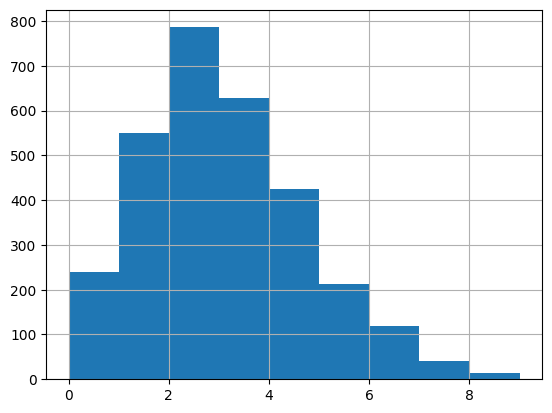

In [42]:
#Построим гистограмму плотности распределния количества голов за матч
Seria_A['total_goal'].hist(bins=9)

Распределени количества голов за матч имеет положительную скошенность

In [43]:
#вычислиv среднее, медиану и моду
print(f"Среднее {Seria_A.total_goal.mean()}")
print(f"Медиана {Seria_A.total_goal.median()}")
print(f"Мода {list(Seria_A.total_goal.mode())}")

Среднее 2.6168379184620485
Медиана 2.0
Мода [2]


Так как среднее юольше медианы, аспределени количества голов за матч имеет положительную скошенность

2. Не так уж много голов забивается в Серии А, а в каких лигах забивается в среднем голов за матч больше? Выведите их названия.

In [44]:
#Выберем из базы двнных матчи Серии А и количество голов забитых в них
All_Leagues = pd.read_sql_query(
'''
with t1 as (
select	-- Найдем среднее количество голов во всех лигах
	leag.name,
	avg(match.home_team_goal + match.away_team_goal) over (partition by leag.name) mean_goal
from
	League leag
join match match 
on
	leag.id = match.league_id)
select	--Выведем лиги где голов больше чем в Серии А
	name,
	mean_goal 
from
	t1
where
	mean_goal > 2.6168379184620485
group by
	name
order by
	mean_goal desc
'''
, cnx)

All_Leagues

,name,mean_goal
0,Netherlands Eredivisie,3.080882
1,Switzerland Super League,2.929677
2,Germany 1. Bundesliga,2.901552
3,Belgium Jupiler League,2.801505
4,Spain LIGA BBVA,2.767105
5,England Premier League,2.710526
6,Scotland Premier League,2.633772


3. Таких лиг довольно много. Выберем самую интересную лигу и самый интересный сезон в ней. Для этого посчитаем следующие показатели:

- сколько в среднем в каждом сезоне каждой лиги забивалось суммарно голов командами за матч

- сколько в среднем матчей за сезон заканчивались победой, а не ничьей.

In [49]:
All_Leagues_season = pd.read_sql_query(
    '''
    select	-- Найдем среднее количество голов во всех лигах
	leag.name,
    match.season,
	match.home_team_goal, 
	match.away_team_goal,
	avg(match.home_team_goal + match.away_team_goal) as total_goal
    from
	League leag
join match match 
on
	leag.id = match.league_id
group by leag.name, match.season
order by total_goal desc
    '''
    , cnx)

All_Leagues_season

,name,season,home_team_goal,away_team_goal,total_goal
0,Switzerland Super League,2009/2010,1,0,3.327778
1,Netherlands Eredivisie,2011/2012,0,2,3.258170
2,Netherlands Eredivisie,2010/2011,0,0,3.225490
3,Netherlands Eredivisie,2013/2014,3,0,3.196078
4,Germany 1. Bundesliga,2013/2014,3,1,3.160131
...,...,...,...,...,...
83,Portugal Liga ZON Sagres,2008/2009,2,0,2.300000
84,France Ligue 1,2008/2009,2,1,2.257895
85,Poland Ekstraklasa,2009/2010,2,0,2.216667
86,Poland Ekstraklasa,2011/2012,1,2,2.195833


In [46]:
All_Leagues = pd.read_sql_query(
'''
with t1 as (
select	-- Найдем среднее количество голов во всех лигах
	leag.name,
    match.season,
	match.home_team_goal, 
	match.away_team_goal,
	match.home_team_goal + match.away_team_goal as total_goal
from
	League leag
join match match 
on
	leag.id = match.league_id)
select	--Выведем лиги где голов больше чем в Серии А
	name,
	mean_goal 
from
	t1
where
	mean_goal > 2.6168379184620485
group by
	name
order by
	mean_goal desc
'''
, cnx)

All_Leagues

DatabaseError: Execution failed on sql '
with t1 as (
select	-- Найдем среднее количество голов во всех лигах
	leag.name,
    match.season,
	match.home_team_goal, 
	match.away_team_goal,
	match.home_team_goal + match.away_team_goal as total_goal
from
	League leag
join match match 
on
	leag.id = match.league_id)
select	--Выведем лиги где голов больше чем в Серии А
	name,
	mean_goal 
from
	t1
where
	mean_goal > 2.6168379184620485
group by
	name
order by
	mean_goal desc
': no such column: mean_goal

In [ ]:
League = pd.read_sql_query("SELECT * FROM Match", cnx)
League.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
Team = pd.read_sql_query("SELECT * FROM Team", cnx)
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU
